In [1]:
# import python packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
import seaborn as sns
from matplotlib.colors import LogNorm
from numpy import save,load
from path import Path
# import own Code
import model_2D

# Setting the parameters

In [2]:
# here all parameters are in mV,s and Hz
w = 2.2
beta = 0.4

I = 1.75
theta = 10

g = 0.25

params_sigmoid = [g,theta]
params_weights = [beta,w,I]

In [3]:
model_2D.tau_a,model_2D.N,model_2D.dt

(1, 600, 0.001)

# Run simulation over grid

In [4]:
I_grid = np.arange(-1,4.75,0.25)
w_grid = np.arange(1.5,2.95,0.05)
w_grid = w_grid[::-1] # reversing from big to small values

param_grid = {'I': I_grid,'w': w_grid}
grid = list(ParameterGrid(param_grid))

rows_matrix = len(w_grid)
cols_matrix = len(I_grid)

In [5]:
I_grid,w_grid

(array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
         1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,
         3.5 ,  3.75,  4.  ,  4.25,  4.5 ]),
 array([2.95, 2.9 , 2.85, 2.8 , 2.75, 2.7 , 2.65, 2.6 , 2.55, 2.5 , 2.45,
        2.4 , 2.35, 2.3 , 2.25, 2.2 , 2.15, 2.1 , 2.05, 2.  , 1.95, 1.9 ,
        1.85, 1.8 , 1.75, 1.7 , 1.65, 1.6 , 1.55, 1.5 ]))

In [4]:
# changing population size if desired
#model_2D.N = 1200
# changing tau_a if desired
#model_2D.tau_a = 0.5

# Run simulation mult Noise model

In [6]:
meanUP_matrix = np.zeros((rows_matrix,cols_matrix))
meanDOWN_matrix = np.zeros((rows_matrix,cols_matrix))
cvUP_matrix = np.zeros((rows_matrix,cols_matrix))
cvDOWN_matrix = np.zeros((rows_matrix,cols_matrix))
percUP_matrix = np.zeros((rows_matrix,cols_matrix))
percDOWN_matrix = np.zeros((rows_matrix,cols_matrix))
scc_lag0_matrix = np.zeros((rows_matrix,cols_matrix))
scc_lag1_matrix = np.zeros((rows_matrix,cols_matrix))
skewUP_matrix = np.zeros((rows_matrix,cols_matrix))
skewDOWN_matrix = np.zeros((rows_matrix,cols_matrix))
kramer_matrix = np.zeros((rows_matrix,cols_matrix))
sigma_mult_w_matrix = np.zeros((rows_matrix,cols_matrix))

for param in grid:
    I = param['I']
    w = param['w']
    index_x = np.where(w_grid == w)[0][0]
    index_y = np.where(I_grid == I)[0][0]
    print(f"Gridpoint with I = {I} and w = {w}")
    params_weights = [beta,w,I] #updating the parameters
    # Mult gauss noise with noise in adaptation and excitation
    results,kramer_sig = model_2D.get_stats_of_model(6000,model_2D.run_sim_2D_grid_adapt_noise,model_2D.f_mult_gauss_noise,params_sigmoid,params_weights)
    percUP,percDOWN,mean_up,cv_up,mean_down,cv_down,skew_up,skew_down,scc_lag0,scc_lag1 = results
    
    percUP_matrix[index_x,index_y] = percUP
    percDOWN_matrix[index_x,index_y] = percDOWN
    meanUP_matrix[index_x,index_y] = mean_up
    meanDOWN_matrix[index_x,index_y] = mean_down
    cvUP_matrix[index_x,index_y] = cv_up
    cvDOWN_matrix[index_x,index_y] = cv_down
    scc_lag0_matrix[index_x,index_y] = scc_lag0
    scc_lag1_matrix[index_x,index_y] = scc_lag1
    skewUP_matrix[index_x,index_y] = skew_up # adding covariance
    skewDOWN_matrix[index_x,index_y] = skew_down # adding covariance
    kramer_matrix[index_x,index_y] = kramer_sig
    sigma_mult_w_matrix[index_x,index_y] = kramer_sig*w
    print("End of Gridpoint---------------------------------")
    
    

Gridpoint with I = -1.0 and w = 2.950000000000001
infl points [8.14776470914189, 2.4950000884832733]
THRESH DOWN 2.5
THRESH UP 8.15
Up and Down Transitions present!
Len UP/DOWN dur no equal len 410 411
End of Gridpoint---------------------------------
Gridpoint with I = -1.0 and w = 2.9000000000000012
infl points [8.015620918581277, 2.4384292061507393]
THRESH DOWN 2.44
THRESH UP 8.02
Up and Down Transitions present!
Len UP/DOWN dur equal len 604 604
End of Gridpoint---------------------------------
Gridpoint with I = -1.0 and w = 2.8500000000000014
infl points [7.911759987030663, 2.376803753314712]
THRESH DOWN 2.38
THRESH UP 7.91
Up and Down Transitions present!
Len UP/DOWN dur no equal len 794 795
End of Gridpoint---------------------------------
Gridpoint with I = -1.0 and w = 2.800000000000001
infl points [7.816341412080835, 2.312822815954847]
THRESH DOWN 2.31
THRESH UP 7.82
Up and Down Transitions present!
Len UP/DOWN dur equal len 918 918
End of Gridpoint--------------------------

KeyboardInterrupt: 

In [10]:
# saving the simulated data
path_save = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 1200/grid_mult2/')
save(Path.joinpath(path_save, 'percUP_matrix.npy'),percUP_matrix)
save(Path.joinpath(path_save, 'percDOWN_matrix.npy'),percDOWN_matrix)
save(Path.joinpath(path_save, 'cvUP_matrix.npy'),cvUP_matrix)
save(Path.joinpath(path_save, 'cvDOWN_matrix.npy'),cvDOWN_matrix)
save(Path.joinpath(path_save, 'meanUP_matrix.npy'),meanUP_matrix)
save(Path.joinpath(path_save, 'meanDOWN_matrix.npy'),meanDOWN_matrix)
save(Path.joinpath(path_save, 'scc_lag0_matrix.npy'),scc_lag0_matrix)
save(Path.joinpath(path_save, 'scc_lag1_matrix.npy'),scc_lag1_matrix)
save(Path.joinpath(path_save, 'skewUP_matrix.npy'),skewUP_matrix)
save(Path.joinpath(path_save, 'skewDOWN_matrix.npy'),skewDOWN_matrix)
save(Path.joinpath(path_save, 'kramer_matrix.npy'),kramer_matrix)
save(Path.joinpath(path_save, 'sigma_mult_w_matrix.npy'),sigma_mult_w_matrix)

#save(Path.joinpath(path_save, 'I_grid.npy'),I_grid)
#save(Path.joinpath(path_save, 'w_grid.npy'),w_grid)

In [9]:
# checking the mean Kramer-Moyals coefficient over the grid
main_path_mult = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000//6000_simtime/N = 300/grid_mult2/')
sigma_mult_w_matrix = load(Path.joinpath(main_path_mult, "sigma_mult_w_matrix.npy"))
perc_up_matrix = load(Path.joinpath(main_path_mult, "percUP_matrix.npy"))

nan_perc = np.isnan(perc_up_matrix)
sigma_mult_w_matrix_notnan = sigma_mult_w_matrix[~nan_perc]

#print(np.mean(sigma_mult_w_matrix))# wobei ich den mean von denen nehmen will wo überhaupt transitions da waren
print(np.mean(sigma_mult_w_matrix_notnan))

#mean_sig = np.mean(sigma_mult_w_matrix_notnan)

mean_sig = 0.13 #use low noise now
#model_2D.tau_a = 1
mean_sig

0.3068878552947916


0.13

# Run simulation add noise model

In [ ]:
# can chose whether use kramer moyal noise or constant noise

In [10]:
# For loop for the corresponding additive model
# also have noise in the adaptation
meanUP_matrix = np.zeros((rows_matrix,cols_matrix))
meanDOWN_matrix = np.zeros((rows_matrix,cols_matrix))
cvUP_matrix = np.zeros((rows_matrix,cols_matrix))
cvDOWN_matrix = np.zeros((rows_matrix,cols_matrix))
percUP_matrix = np.zeros((rows_matrix,cols_matrix))
percDOWN_matrix = np.zeros((rows_matrix,cols_matrix))
scc_lag0_matrix = np.zeros((rows_matrix,cols_matrix))
scc_lag1_matrix = np.zeros((rows_matrix,cols_matrix))
skewUP_matrix = np.zeros((rows_matrix,cols_matrix))
skewDOWN_matrix = np.zeros((rows_matrix,cols_matrix))


for param in grid:
    I = param['I']
    w = param['w']
    index_x = np.where(w_grid == w)[0][0]
    index_y = np.where(I_grid == I)[0][0]
    #sig_e = kramer_matrix[index_x,index_y] # get the estimated noise from Kramers-Moyal
    print(f"Gridpoint with I = {I} and w = {w}")
    params_weights = [beta,w,I] #updating the parameters
    # using mean_sig as parameter here right now, w is already included therefore using model_2D.run_sim_2D_grid_noise_constant
    results,kramer_sig = model_2D.get_stats_of_model(6000,model_2D.run_sim_2D_grid_noise_constant,model_2D.f_add_noise,params_sigmoid,params_weights,mean_sig)
    percUP,percDOWN,mean_up,cv_up,mean_down,cv_down,skew_up,skew_down,scc_lag0,scc_lag1 = results
    
    print("kramer_sig",kramer_sig)
    
    percUP_matrix[index_x,index_y] = percUP
    percDOWN_matrix[index_x,index_y] = percDOWN
    meanUP_matrix[index_x,index_y] = mean_up
    meanDOWN_matrix[index_x,index_y] = mean_down
    cvUP_matrix[index_x,index_y] = cv_up
    cvDOWN_matrix[index_x,index_y] = cv_down
    scc_lag0_matrix[index_x,index_y] = scc_lag0
    scc_lag1_matrix[index_x,index_y] = scc_lag1
    skewUP_matrix[index_x,index_y] = skew_up # adding covariance
    skewDOWN_matrix[index_x,index_y] = skew_down # adding covariance

    print("End of Gridpoint---------------------------------")
    

Gridpoint with I = -1.0 and w = 2.950000000000001
infl points [9.497077187420029, 9.34158476149701]
No Up and Down Dynamics: Inflection point outside support
No Up and Down transitions!
kramer_sig 0.13000300712513674
End of Gridpoint---------------------------------
Gridpoint with I = -1.0 and w = 2.9000000000000012
infl points [9.423597287821712, 8.51432248518113]
No Up and Down Dynamics: Inflection point outside support
No Up and Down transitions!
kramer_sig 0.12995107015888166
End of Gridpoint---------------------------------
Gridpoint with I = -1.0 and w = 2.8500000000000014
infl points [9.267976434609167, 9.160806674089585]
No Up and Down Dynamics: Inflection point outside support
No Up and Down transitions!
kramer_sig 0.1299971023290034
End of Gridpoint---------------------------------
Gridpoint with I = -1.0 and w = 2.800000000000001
infl points [9.24956791239534, 9.017611310433251]
No Up and Down Dynamics: Inflection point outside support
No Up and Down transitions!
kramer_sig 

KeyboardInterrupt: 

In [14]:
# saving the data
path_save = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/Grid w versus I/big grid/taua_1000/6000_simtime/N = 600/grid_add_noadaptnoise_constlow2/')
save(Path.joinpath(path_save, 'percUP_matrix.npy'),percUP_matrix)
save(Path.joinpath(path_save, 'percDOWN_matrix.npy'),percDOWN_matrix)
save(Path.joinpath(path_save, 'cvUP_matrix.npy'),cvUP_matrix)
save(Path.joinpath(path_save, 'cvDOWN_matrix.npy'),cvDOWN_matrix)
save(Path.joinpath(path_save, 'meanUP_matrix.npy'),meanUP_matrix)
save(Path.joinpath(path_save, 'meanDOWN_matrix.npy'),meanDOWN_matrix)
save(Path.joinpath(path_save, 'scc_lag0_matrix.npy'),scc_lag0_matrix)
save(Path.joinpath(path_save, 'scc_lag1_matrix.npy'),scc_lag1_matrix)
save(Path.joinpath(path_save, 'skewUP_matrix.npy'),skewUP_matrix)
save(Path.joinpath(path_save, 'skewDOWN_matrix.npy'),skewDOWN_matrix)

# Same parameters but different noise strengths simulation

In [41]:
noise_strength = np.arange(0.06,0.4,0.02)

In [42]:
cols_array = len(noise_strength)

Gridpoint with sigma = 0.06
coefficients poly [-0.02673429  0.53550767 -3.22533151  5.43103543  9.42031579]


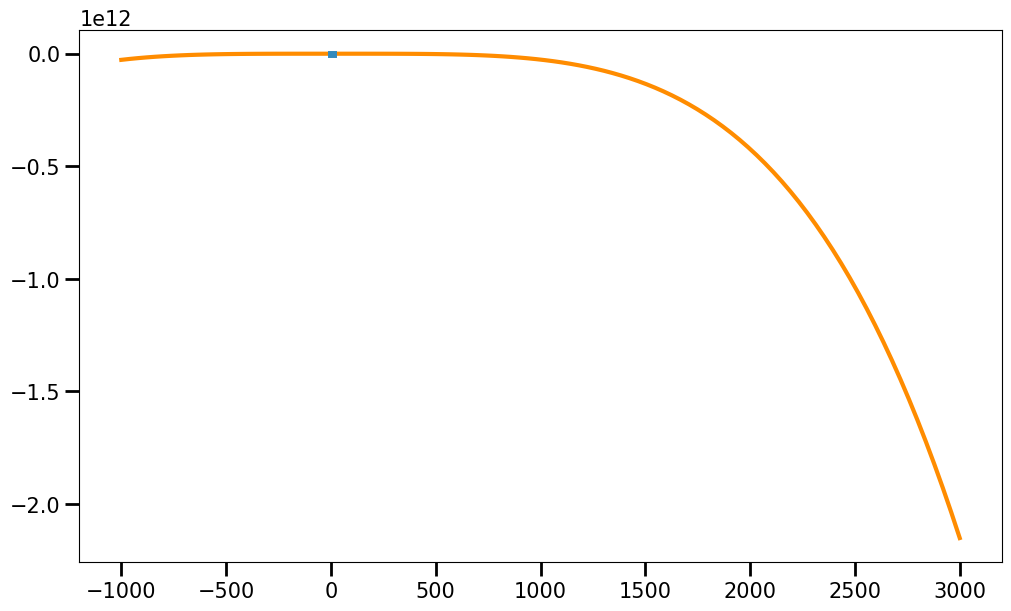

infl points [7.2369413746390805, 2.7784295573127236]


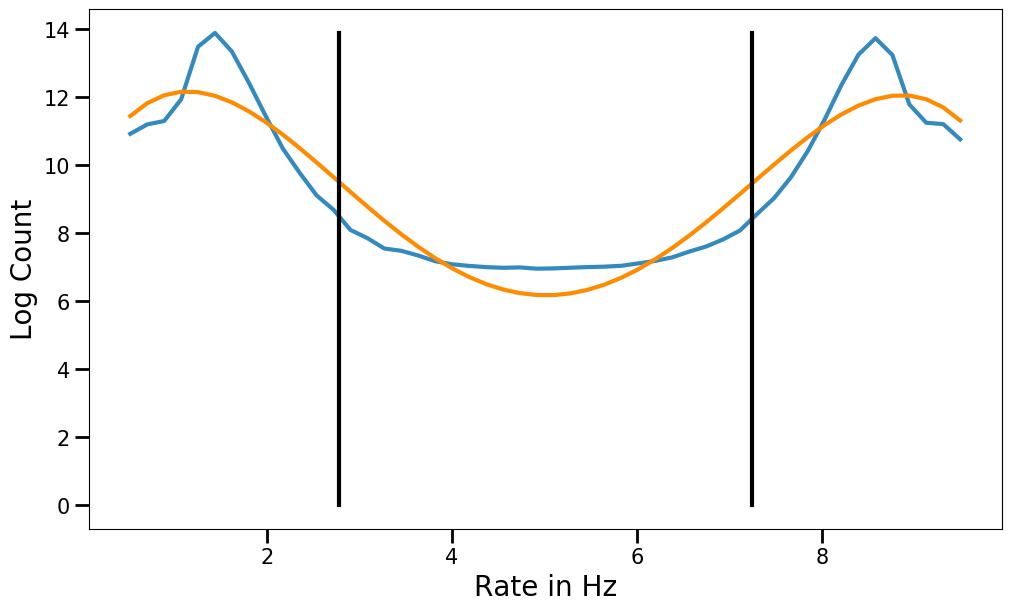

THRESH DOWN 2.78
THRESH UP 7.24
Up and Down Transitions present!
kramer_sig 0.05997866866063171
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.08
coefficients poly [-0.01705032  0.34123927 -1.9696044   2.63226658 11.52134189]


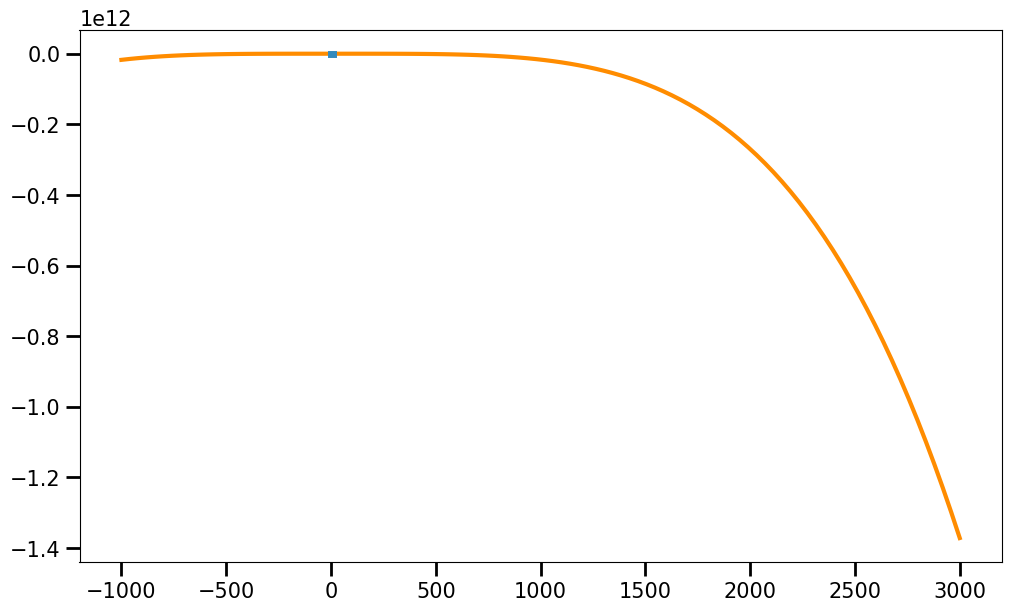

infl points [7.407850718593762, 2.5989811013047954]


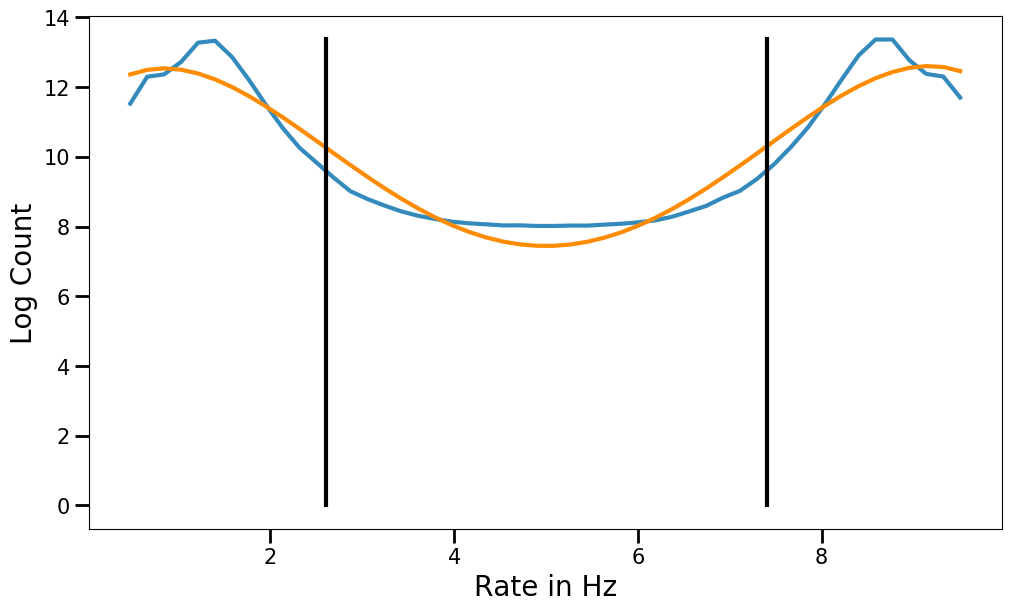

THRESH DOWN 2.6
THRESH UP 7.41
Up and Down Transitions present!
Len UP/DOWN dur equal len 538 538
kramer_sig 0.07999004769652049
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.1
coefficients poly [-0.01286042  0.2582303  -1.44807516  1.53274525 12.21257073]


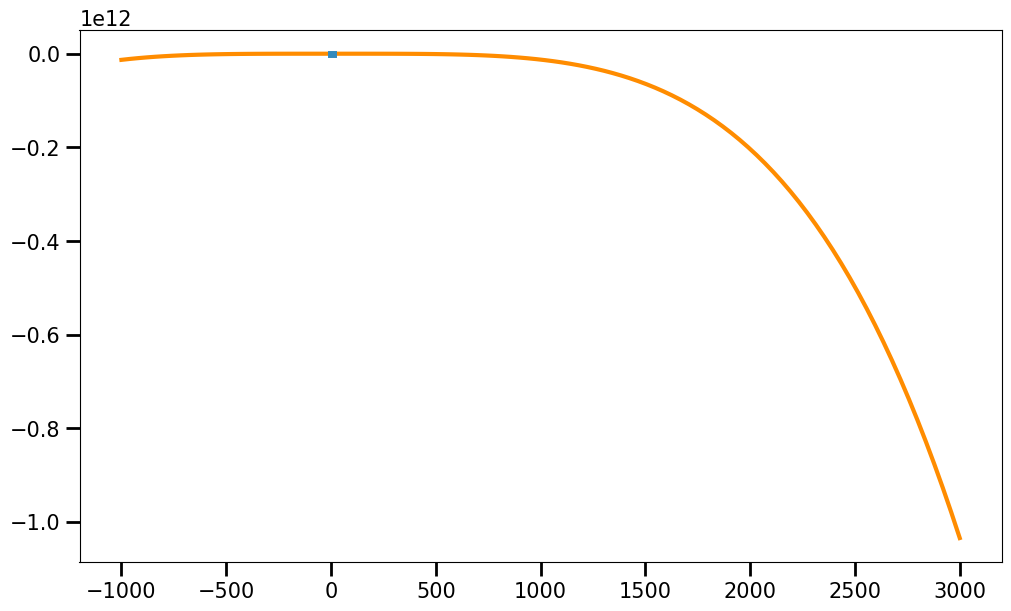

infl points [7.5560975408251805, 2.4836308800901437]


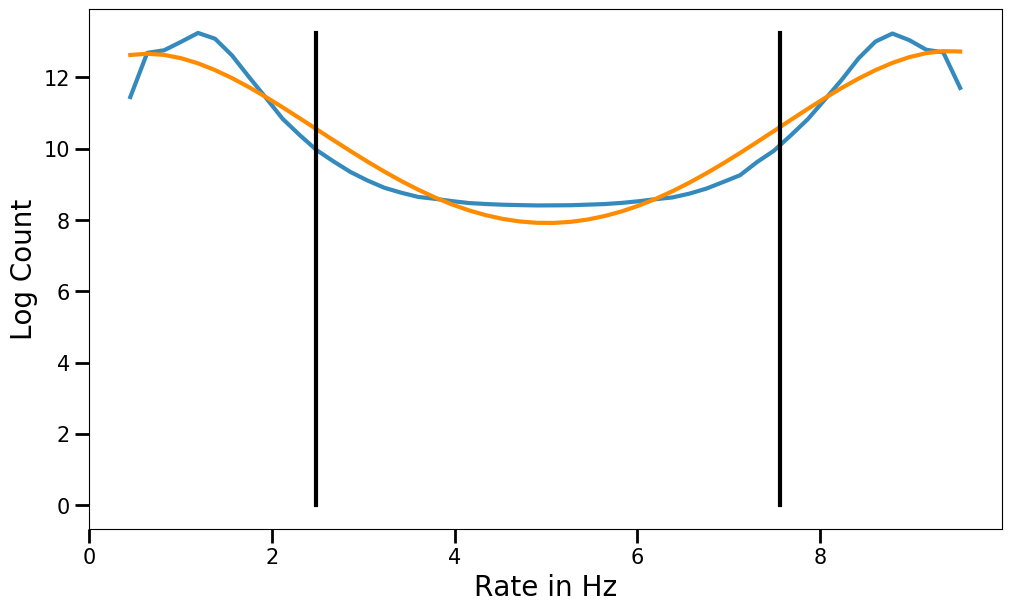

THRESH DOWN 2.48
THRESH UP 7.56
Up and Down Transitions present!
Len UP/DOWN dur equal len 807 807
kramer_sig 0.09999840898647766
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.12000000000000001
coefficients poly [-1.01121923e-02  2.03248650e-01 -1.09899011e+00  7.90491939e-01
  1.26294174e+01]


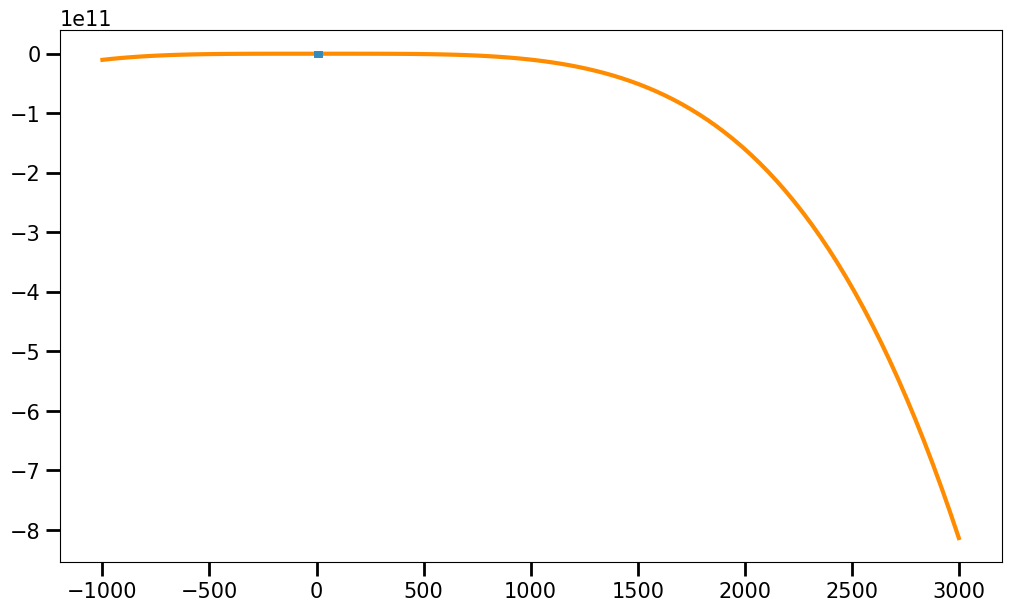

infl points [7.6961232236103205, 2.353559597704071]


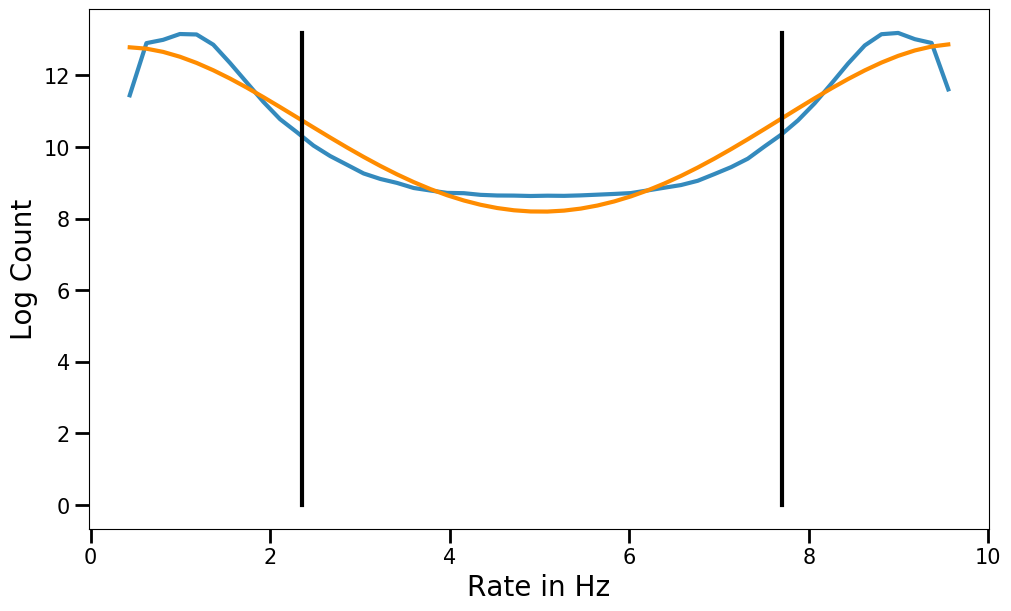

THRESH DOWN 2.35
THRESH UP 7.7
Up and Down Transitions present!
Len UP/DOWN dur equal len 1035 1035
kramer_sig 0.12005827580114063
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.14
coefficients poly [-1.00000000e-02  2.00982100e-01 -1.09743840e+00  8.93582081e-01
  1.24354936e+01]


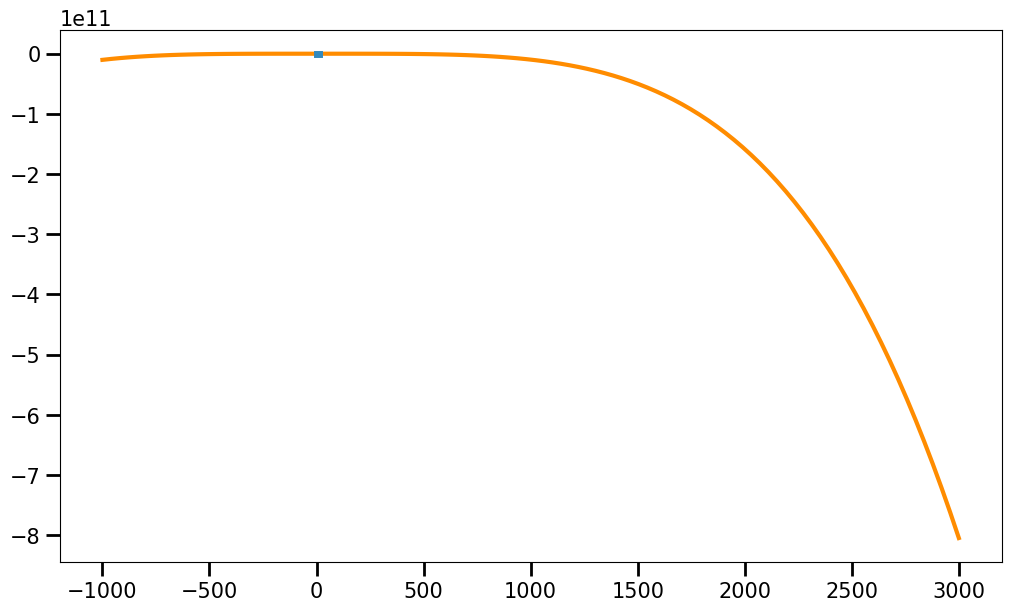

infl points [7.661878365081249, 2.387226622926806]


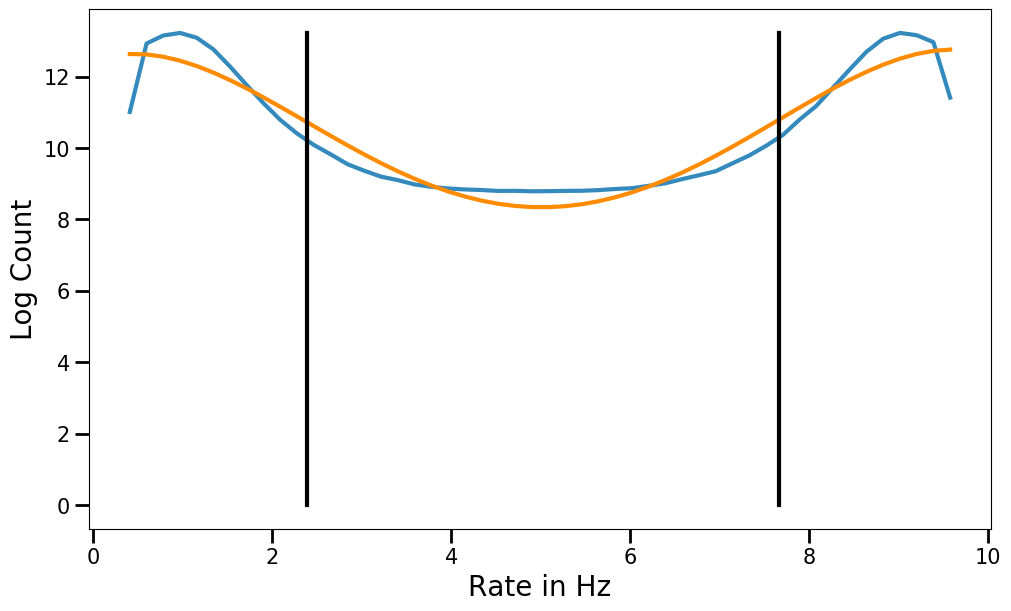

THRESH DOWN 2.39
THRESH UP 7.66
Up and Down Transitions present!
Len UP/DOWN dur no equal len 1215 1216
kramer_sig 0.14000185672563628
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.16000000000000003
coefficients poly [-1.00000000e-02  2.00160806e-01 -1.10214592e+00  1.01176051e+00
  1.22225027e+01]


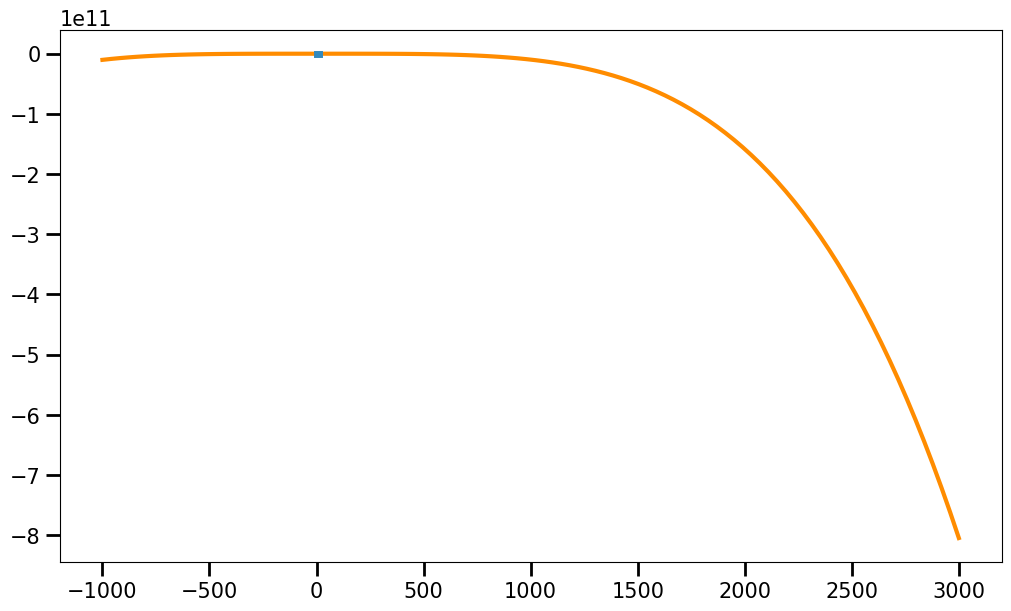

infl points [7.586871072519152, 2.4211692082719143]


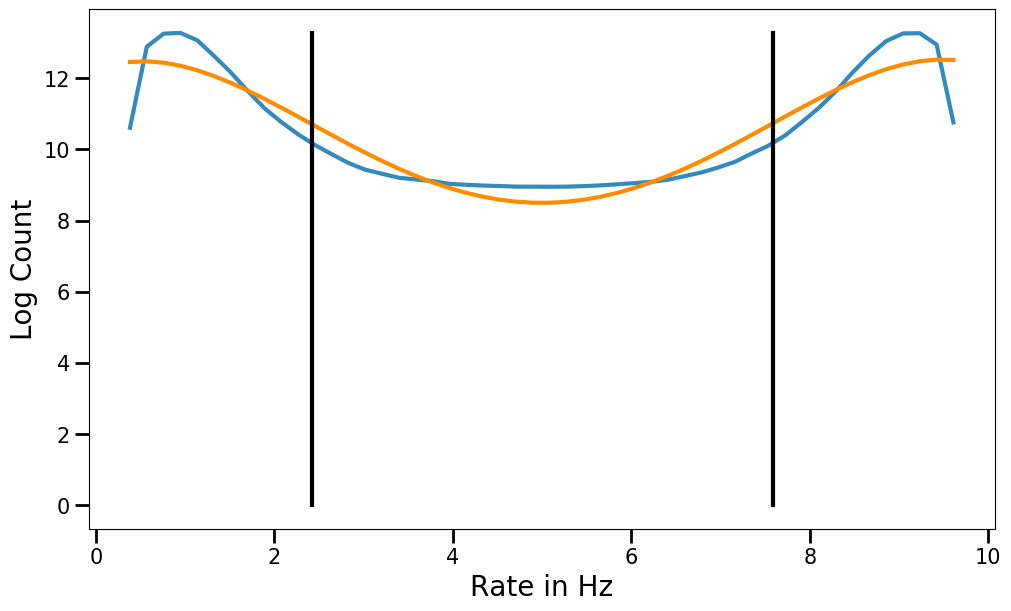

THRESH DOWN 2.42
THRESH UP 7.59
Up and Down Transitions present!
Len UP/DOWN dur equal len 1438 1438
kramer_sig 0.16001513477831517
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.18000000000000002
coefficients poly [-1.00000000e-02  1.99184261e-01 -1.09061933e+00  9.79411389e-01
  1.23047558e+01]


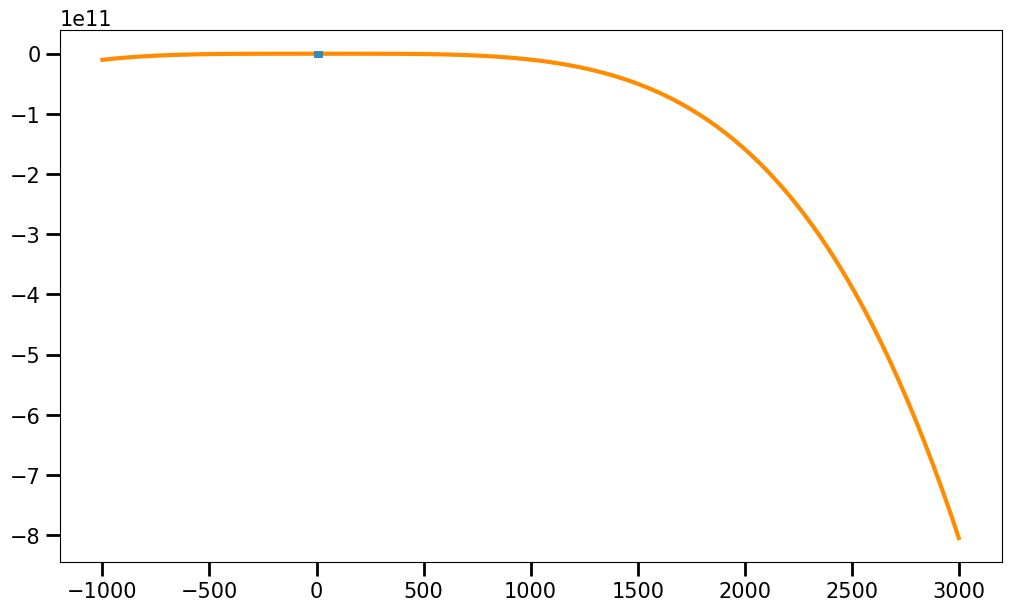

infl points [7.552443926440965, 2.4067691161495173]


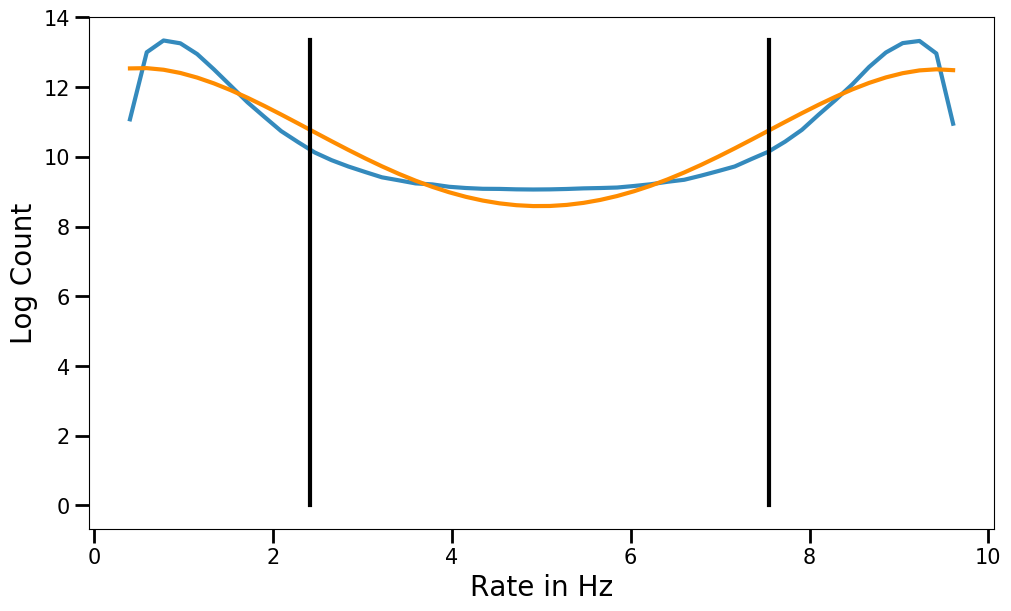

THRESH DOWN 2.41
THRESH UP 7.55
Up and Down Transitions present!
Len UP/DOWN dur equal len 1631 1631
kramer_sig 0.17995957808010185
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.2
coefficients poly [-1.00000000e-02  2.00341833e-01 -1.12023092e+00  1.16965831e+00
  1.20970893e+01]


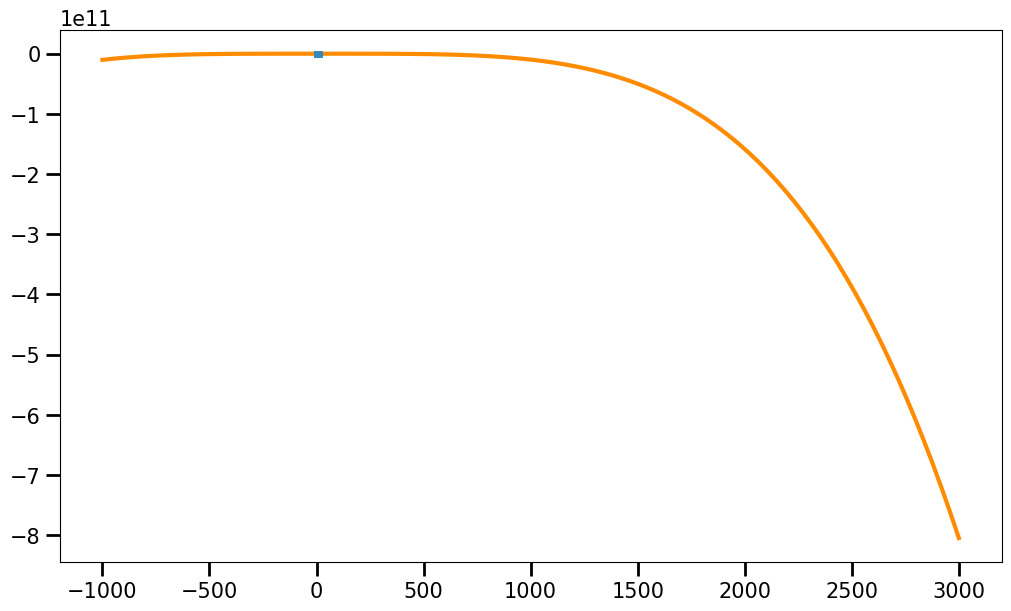

infl points [7.541333997030259, 2.475757659071325]


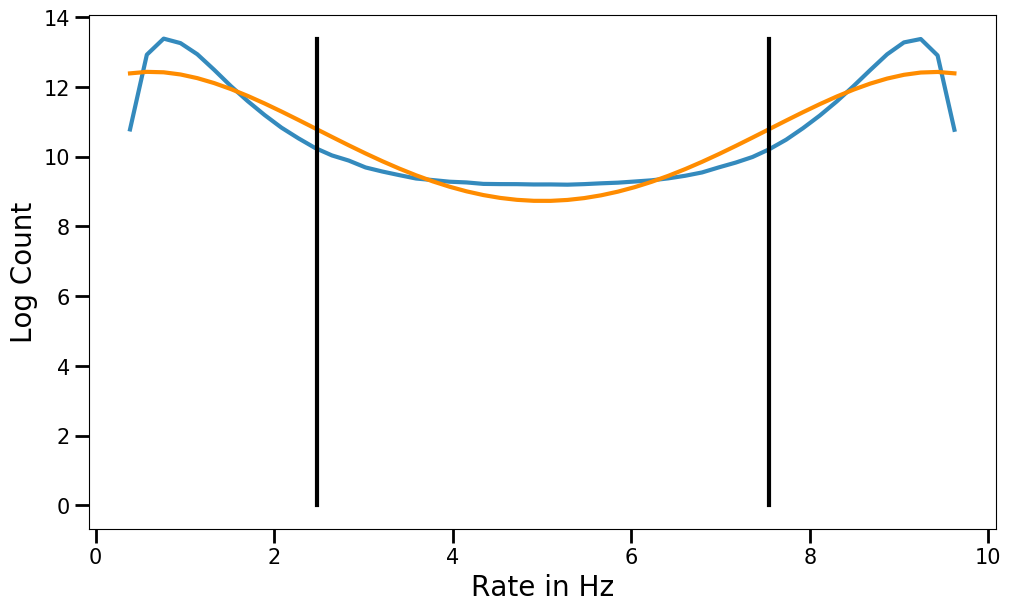

THRESH DOWN 2.48
THRESH UP 7.54
Up and Down Transitions present!
Len UP/DOWN dur no equal len 1879 1880
kramer_sig 0.2000127672154785
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.22000000000000003
coefficients poly [-1.00000000e-02  2.01226661e-01 -1.14861332e+00  1.38145072e+00
  1.17985104e+01]


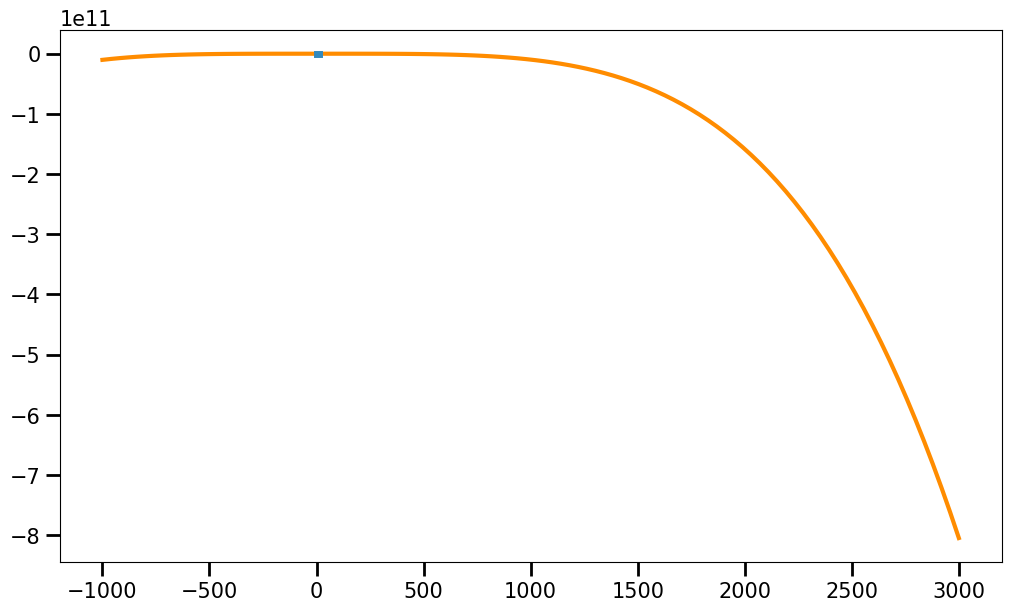

infl points [7.513417052177585, 2.547915983710315]


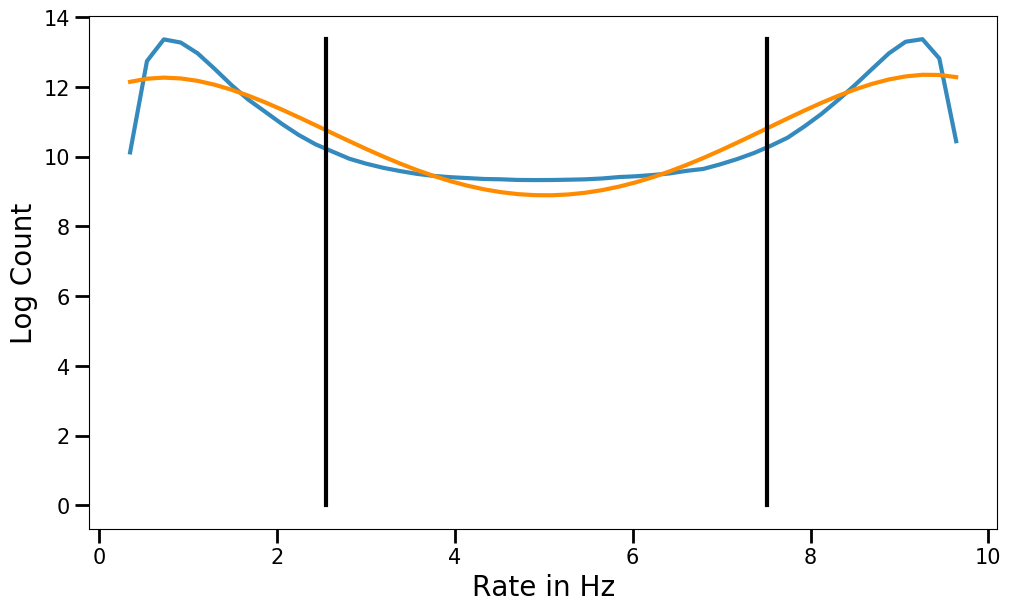

THRESH DOWN 2.55
THRESH UP 7.51
Up and Down Transitions present!
Len UP/DOWN dur no equal len 2109 2110
kramer_sig 0.22007245253668176
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.24000000000000005
coefficients poly [-1.01308975e-02  1.99893355e-01 -1.12121877e+00  1.30958070e+00
  1.18994425e+01]


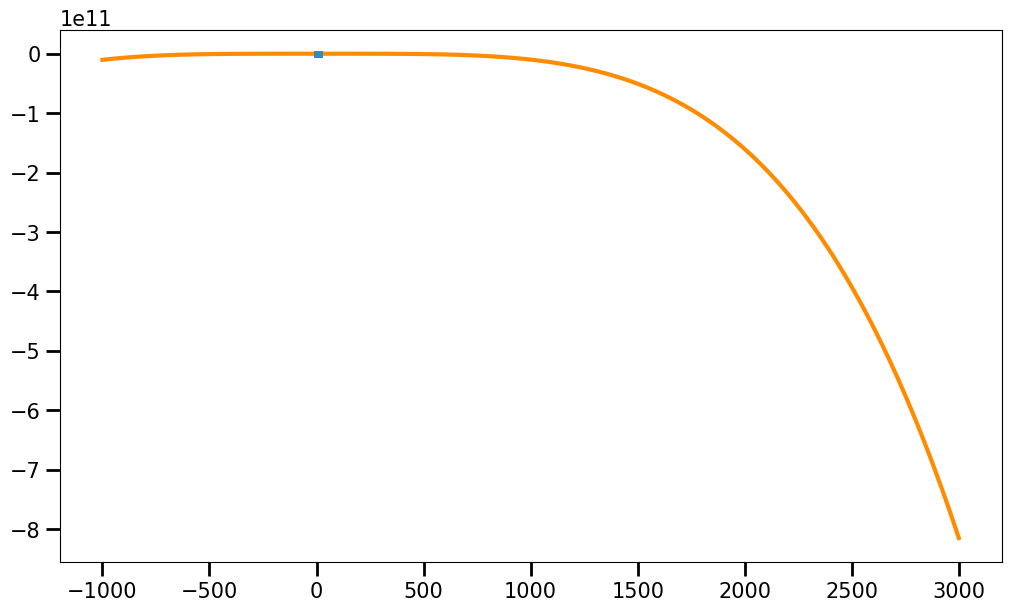

infl points [7.35900523003491, 2.506525206151444]


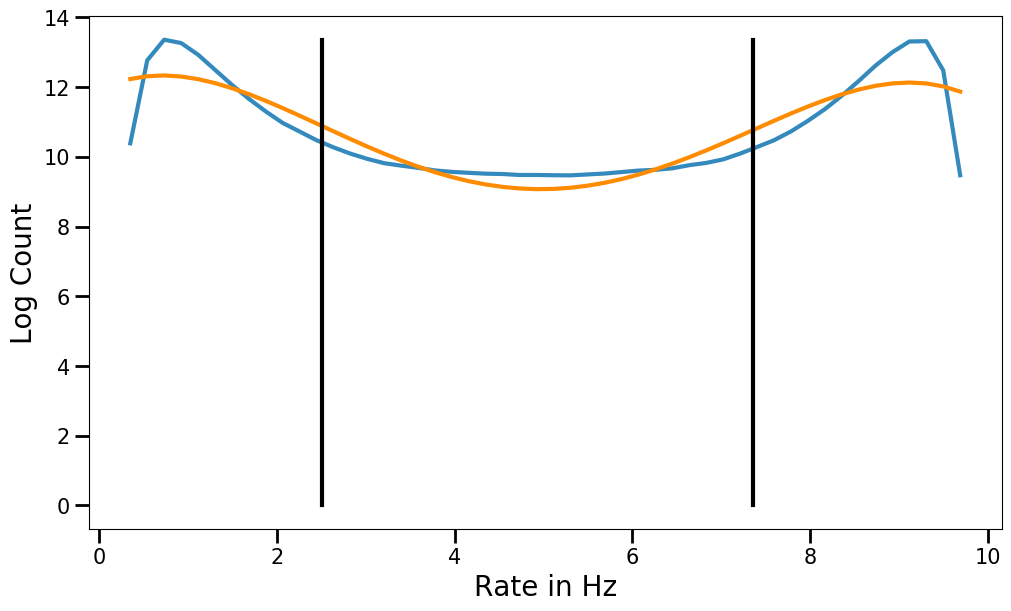

THRESH DOWN 2.51
THRESH UP 7.36
Up and Down Transitions present!
Len UP/DOWN dur equal len 2406 2406
kramer_sig 0.23995365485285838
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.26
coefficients poly [-1.00000000e-02  1.98518753e-01 -1.13147312e+00  1.43813378e+00
  1.17640277e+01]


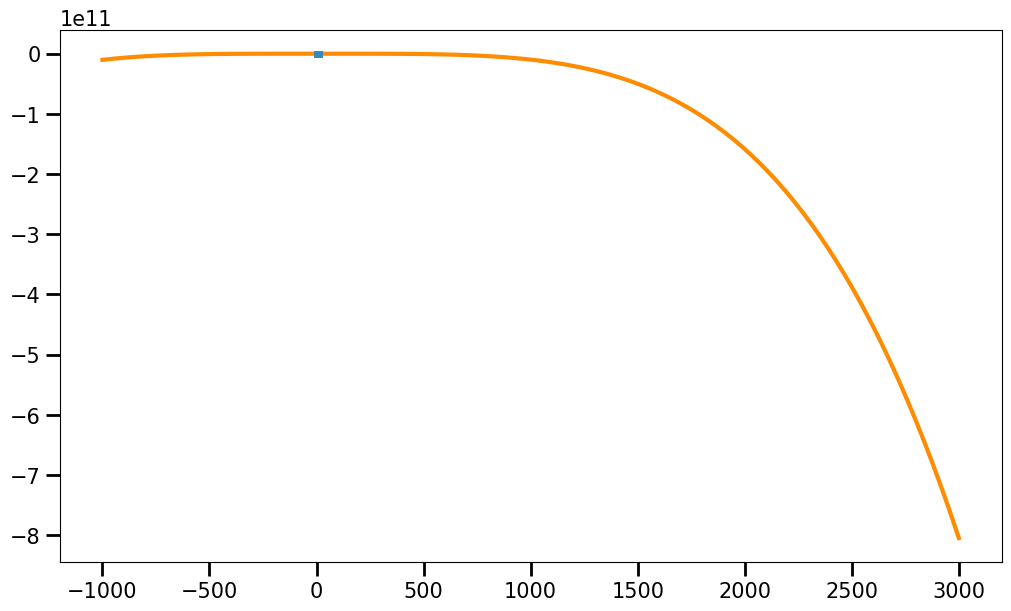

infl points [7.3657119160666475, 2.5602257567213944]


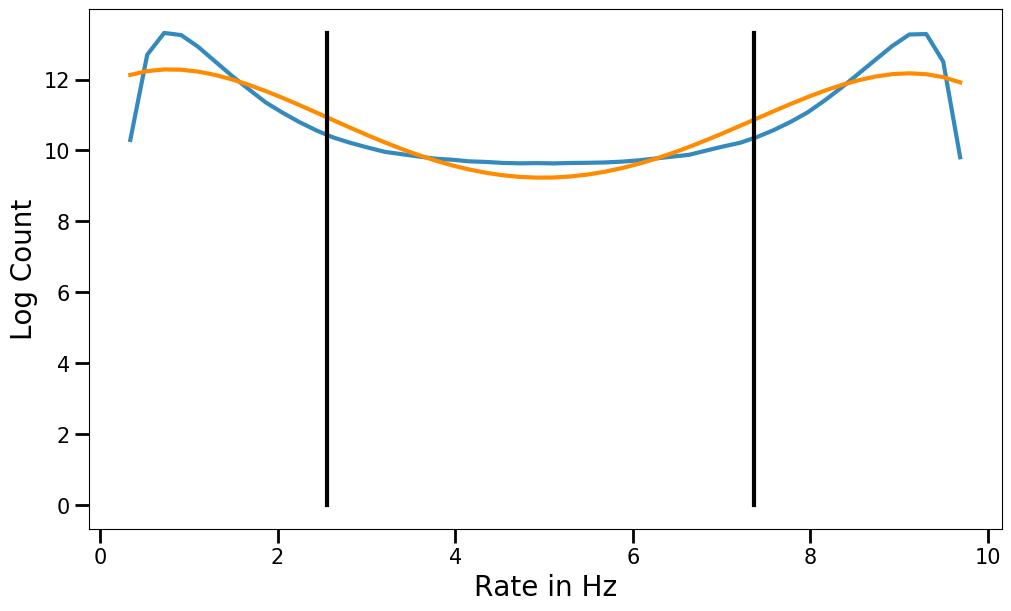

THRESH DOWN 2.56
THRESH UP 7.37
Up and Down Transitions present!
Len UP/DOWN dur no equal len 2780 2781
kramer_sig 0.2600133428960941
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.28
coefficients poly [-1.00000000e-02  2.01898676e-01 -1.19224522e+00  1.75796597e+00
  1.14238664e+01]


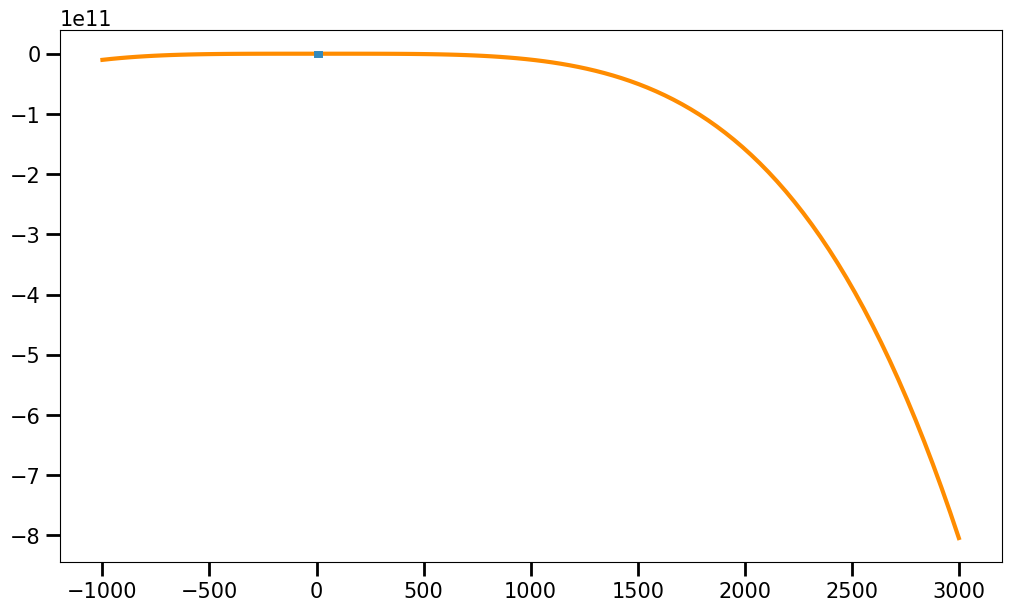

infl points [7.415201768676854, 2.67973202590892]


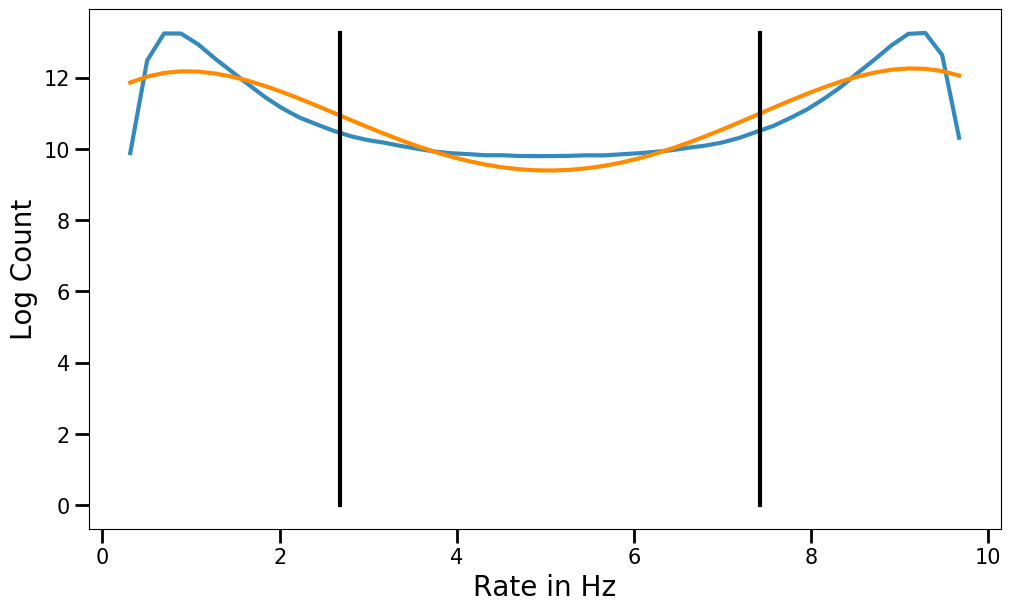

THRESH DOWN 2.68
THRESH UP 7.42
Up and Down Transitions present!
Len UP/DOWN dur equal len 3220 3220
kramer_sig 0.28009362420346934
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.30000000000000004
coefficients poly [-1.04142839e-02  2.08527224e-01 -1.23531382e+00  1.91662479e+00
  1.12842001e+01]


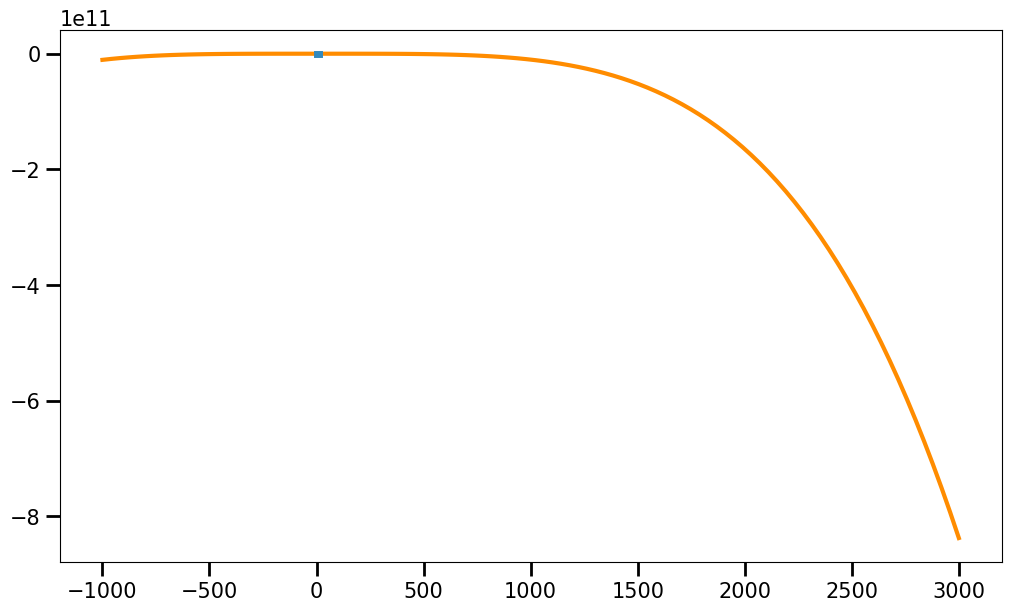

infl points [7.305466825255053, 2.7061300552081744]


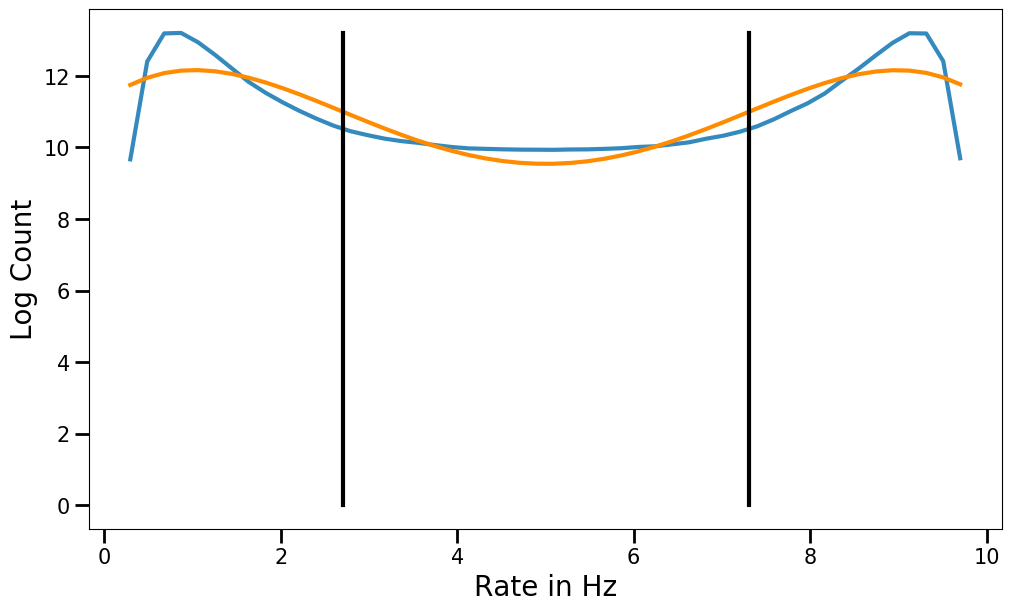

THRESH DOWN 2.71
THRESH UP 7.31
Up and Down Transitions present!
Len UP/DOWN dur equal len 3574 3574
kramer_sig 0.3001182248465362
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.32000000000000006
coefficients poly [-1.00000000e-02  1.99224689e-01 -1.17414799e+00  1.80637699e+00
  1.13891464e+01]


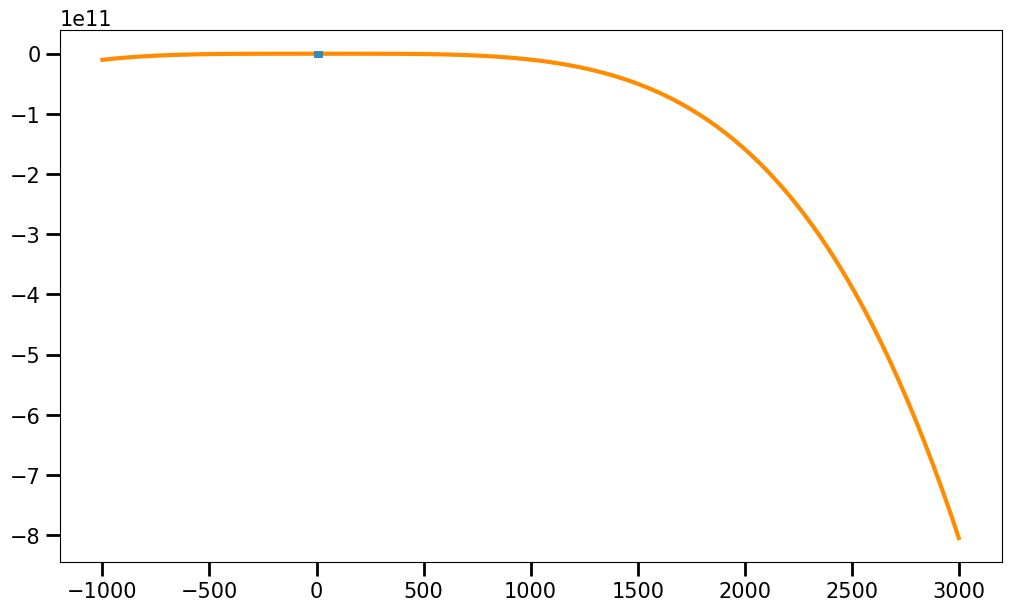

infl points [7.269157064879205, 2.692077363293996]


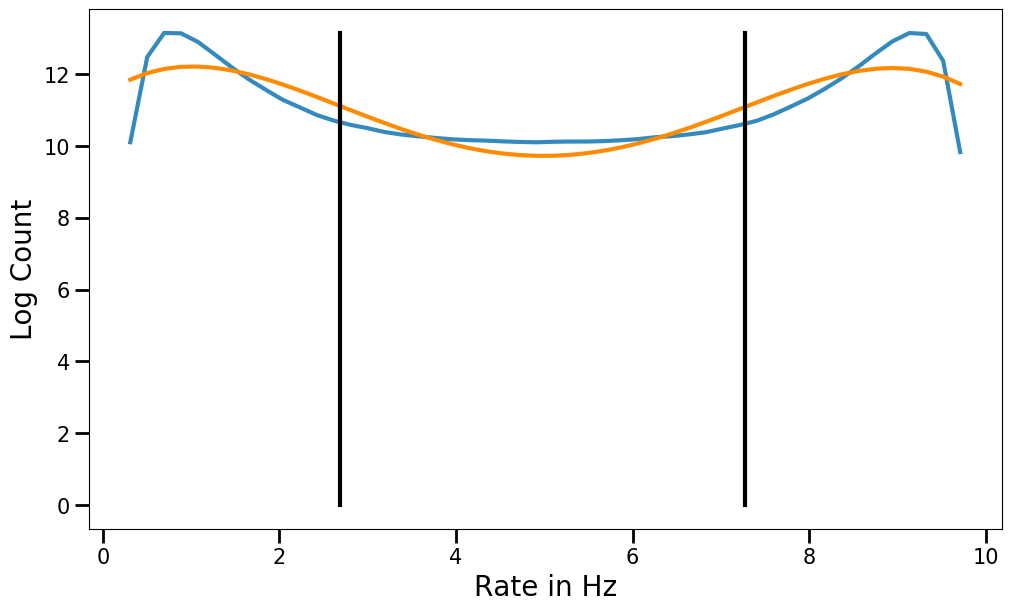

THRESH DOWN 2.69
THRESH UP 7.27
Up and Down Transitions present!
Len UP/DOWN dur equal len 4079 4079
kramer_sig 0.3200074338333154
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.34
coefficients poly [-1.00405108e-02  2.01071249e-01 -1.20750288e+00  2.01435872e+00
  1.11305949e+01]


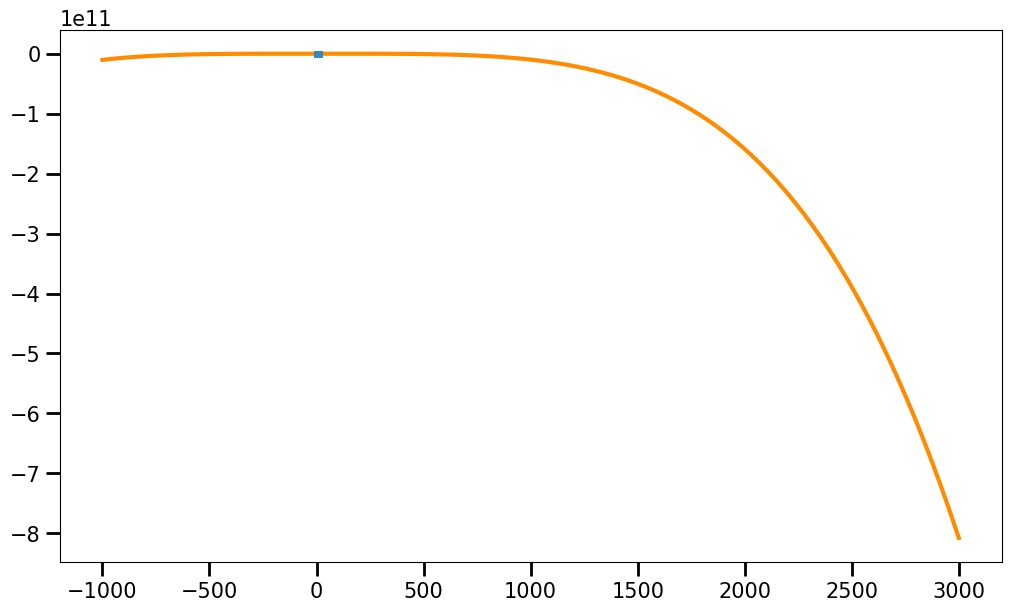

infl points [7.247300368576433, 2.765698641183983]


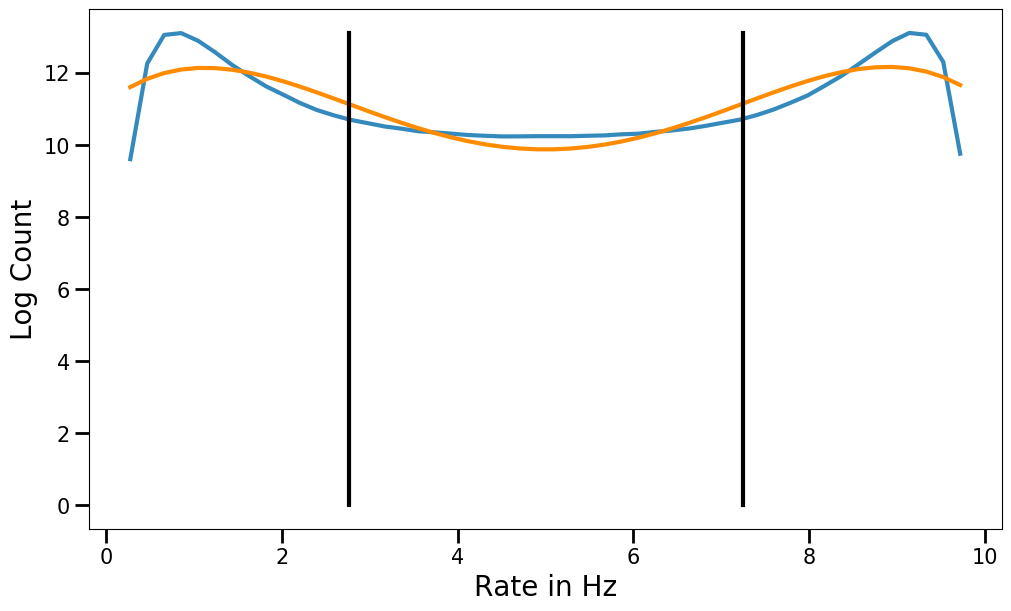

THRESH DOWN 2.77
THRESH UP 7.25
Up and Down Transitions present!
Len UP/DOWN dur equal len 4524 4524
kramer_sig 0.3401219729354206
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.36000000000000004
coefficients poly [-1.00000000e-02  1.99441441e-01 -1.19367979e+00  1.98559596e+00
  1.12083735e+01]


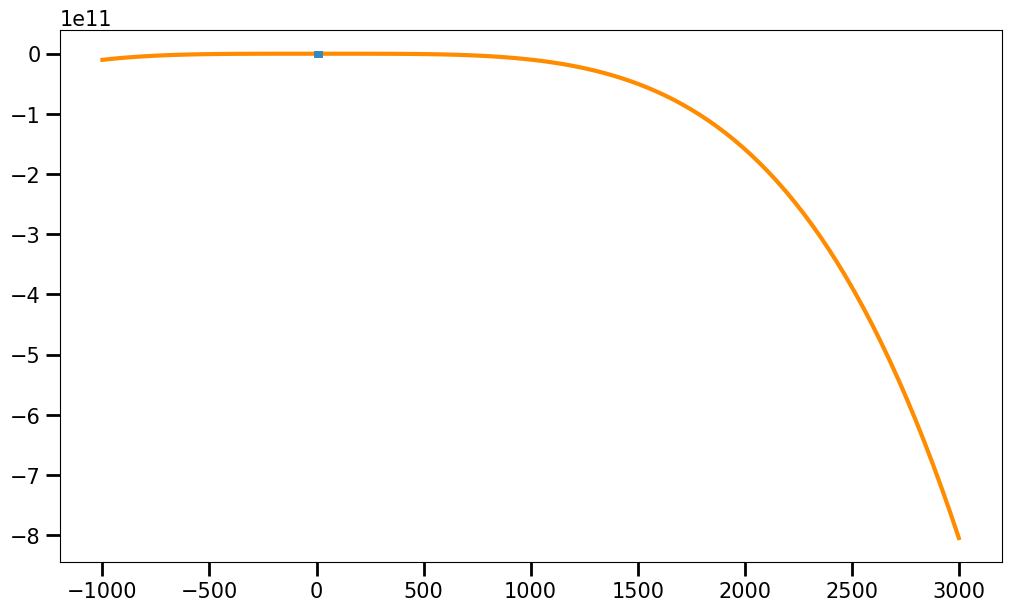

infl points [7.21446420129577, 2.757607846310086]


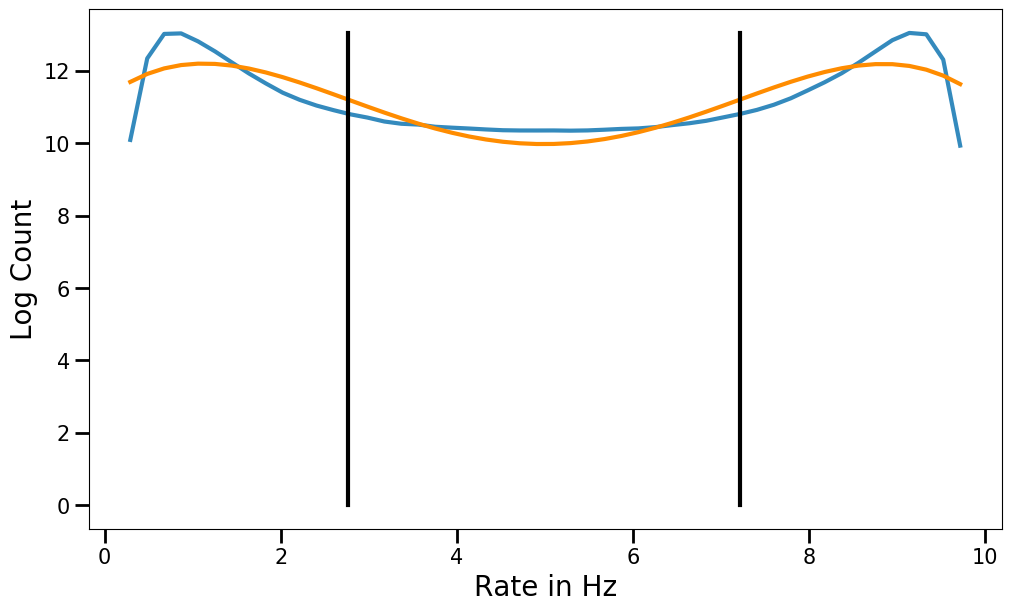

THRESH DOWN 2.76
THRESH UP 7.21
Up and Down Transitions present!
Len UP/DOWN dur no equal len 4944 4945
kramer_sig 0.359759966098486
End of Gridpoint---------------------------------
Gridpoint with sigma = 0.38000000000000006
coefficients poly [-1.00000000e-02  2.01207769e-01 -1.22888403e+00  2.18486614e+00
  1.10042104e+01]


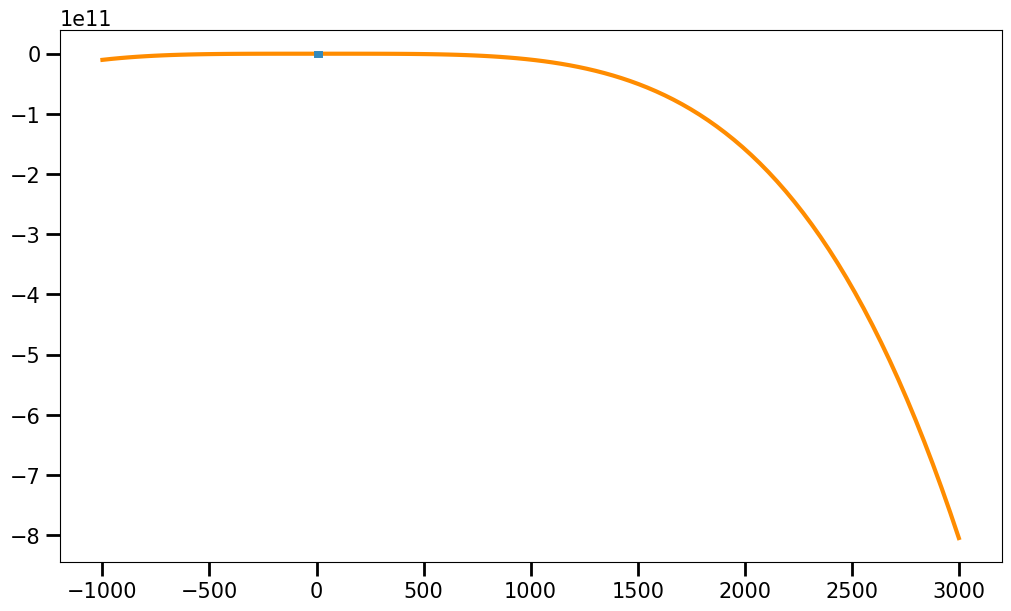

infl points [7.225975035883771, 2.8344134116624855]


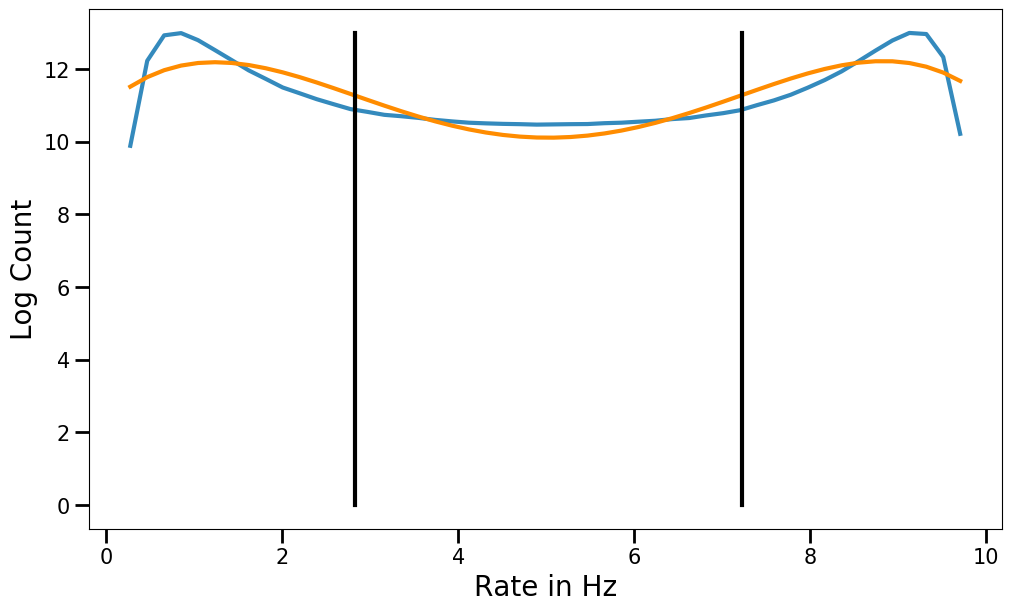

THRESH DOWN 2.83
THRESH UP 7.23
Up and Down Transitions present!
Len UP/DOWN dur equal len 5460 5460
kramer_sig 0.3799969442738847
End of Gridpoint---------------------------------


In [43]:
# For loop for the corresponding additive model
# also have noise in the adaptation
meanUP_matrix = np.zeros((cols_array))
meanDOWN_matrix = np.zeros((cols_array))
cvUP_matrix = np.zeros((cols_array))
cvDOWN_matrix = np.zeros((cols_array))
percUP_matrix = np.zeros((cols_array))
percDOWN_matrix = np.zeros((cols_array))
scc_lag0_matrix = np.zeros((cols_array))
scc_lag1_matrix = np.zeros((cols_array))
skewUP_matrix = np.zeros((cols_array))
skewDOWN_matrix = np.zeros((cols_array))

params_weights = [0.4,2.4,0]


for (i,param) in enumerate(noise_strength):
    #sig_e = kramer_matrix[index_x,index_y] # get the estimated noise component
    print(f"Gridpoint with sigma = {param}")
    # #updating the parameters
    
    results,kramer_sig = model_2D.get_stats_of_model(6000,model_2D.run_sim_2D_grid_noise_constant,model_2D.f_add_noise,params_sigmoid,params_weights,param)
    percUP,percDOWN,mean_up,cv_up,mean_down,cv_down,skew_up,skew_down,scc_lag0,scc_lag1 = results
    
    print("kramer_sig",kramer_sig)
    
    percUP_matrix[i] = percUP
    percDOWN_matrix[i] = percDOWN
    meanUP_matrix[i] = mean_up
    meanDOWN_matrix[i] = mean_down
    cvUP_matrix[i] = cv_up
    cvDOWN_matrix[i] = cv_down
    scc_lag0_matrix[i] = scc_lag0
    scc_lag1_matrix[i] = scc_lag1
    skewUP_matrix[i] = skew_up # adding covariance
    skewDOWN_matrix[i] = skew_down # adding covariance

    print("End of Gridpoint---------------------------------")
    

In [44]:
path_save = Path('/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Data/2D model/vary_sigma_add/taua_1000/6000_simtime/w = 2.4, I = 0/')
save(Path.joinpath(path_save, 'percUP_matrix.npy'),percUP_matrix)
save(Path.joinpath(path_save, 'percDOWN_matrix.npy'),percDOWN_matrix)
save(Path.joinpath(path_save, 'cvUP_matrix.npy'),cvUP_matrix)
save(Path.joinpath(path_save, 'cvDOWN_matrix.npy'),cvDOWN_matrix)
save(Path.joinpath(path_save, 'meanUP_matrix.npy'),meanUP_matrix)
save(Path.joinpath(path_save, 'meanDOWN_matrix.npy'),meanDOWN_matrix)
save(Path.joinpath(path_save, 'scc_lag0_matrix.npy'),scc_lag0_matrix)
save(Path.joinpath(path_save, 'scc_lag1_matrix.npy'),scc_lag1_matrix)
save(Path.joinpath(path_save, 'skewUP_matrix.npy'),skewUP_matrix)
save(Path.joinpath(path_save, 'skewDOWN_matrix.npy'),skewDOWN_matrix)

In [45]:
save(Path.joinpath(path_save, 'noise_strength.npy'),noise_strength)